# Memoria EDA "Voto por renta, el caso de Gipuzkoa 2016-2019"

<a id="indice"></a> <br>
## Índice

1. [Introducción](#1)
2. [Hipotesis a demostrar](#2)
3. [Obtención de Datos](#3)
4. [Metodología](#4)
5. [Correlación Renta-Participación](#5)  
6. [Correlación Variación de Renta-Variación de Participación](#6)  
7. [Conclusiones finales](#7)


<a id="1"></a> <br>
## 1. Introducción

El objetivo de este proyecto de EDA *(Exploratory Data Analisys)* es analizar los datos de participación y renta al nivel censal más pequeño posible (que en españa es la mesa electoral), y analizar la correlación (o su ausencia) entre la renta media y la participación en el proceso electoral.

El análisis partirá de una hipótesis primaria, "a mayor renta, mayor participación electoral", que será verificada con los datos de los procesos electorales de las elecciones al congreso de los diputados de 2016 y 2019, individualmente.

Tras la confirmación o no de la hipótesis, se analizará el comportamiento de aquellas secciones censales que, por motivos de cambio macroeconómico, varían significativamente su nivel de renta, buscando si esto conlleva un cambio proporcional en la participación.

<a id="2"></a> <br>
## 2. Hipótesis a demostrar

1. Hay una correlación directa entre renta media y participación electoral.
2. Este componente puede ser cultural o puramente material. Comprobaré si la variación de la renta media de un proceso electoral a otro influye en la participación.

<a id="3"></a> <br>
## 3. Obtención de Datos

El EDA usará dos fuentes primarias de datos on-line, para los dos parámetros principales que necesita cruzar:

+ Renta: [Instituto Nacional de Estadística](https://www.ine.es/jaxiT3/Tabla.htm?t=31007&L=0)

<img src="../../resources/fuente_INE.png" width="500">
    
+ Participación: [Ministerio del Interior](https://infoelectoral.interior.gob.es/opencms/es/elecciones-celebradas/area-de-descargas/)

<img src="../../resources/fuente_MinInt.png" width="500">

<a id="4"></a> <br>
## 4. Metodología

+ Crear un archivo CSV para cada proceso electoral, que incluya el dato de renta y participación a nivel unidad censal (mesa electoral).
+ Realizar comparativas gráficas y cuantitativas de la correlación de los datos.
+ Cruzar las diferencias entre procesos de renta y participación, respecto de sus medias en cada una de las fechas (así tendremos en cuenta el crecimiento general de la fecha más reciente y lo relativizaremos) de la muestra de mesas, y buscar la correlación en las variaciones de estas.

<a id="5"></a> <br>
## 5.Correlación Renta-Participación

El estudio de este apartado requiere del uso de diversas librerías, para conseguir un CSV de cada convocatoria limpio y con la información correcta.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy as sp

Primero pasaremos del archivo .xlsx, (importado directamente de un .DAT, que contiene toda la información en la misma celda de una columna), a un archivo manejable.

In [2]:
file16 = "..\\..\\raw data\\rawmesasgip2016.csv"

In [3]:
data16 = pd.read_csv(file16,header= None)

In [4]:
data16

,0
0,022016061142000101001 U00002460000246000000000...
1,022016061142000201001 U00003460000346000000000...
2,022016061142000301001 U00005470000547000000000...
3,022016061142000401001 U00002520000252000000000...
4,022016061142000501001 A00005980000598000000000...
...,...
835,022016061142090401001 U00000950000095000000000...
836,022016061142090501001 U00001450000145000000000...
837,022016061142090601001 U00001190000119000000000...
838,022016061142090701001 U00001180000118000000000...


Tras un proceso explicado en [el notebook limpieza_datos.ipynb](../notebooks/limpieza_datos.ipynb), se llega al siguiente dataframe.

In [5]:
file216 = "..\\..\\raw data\\data16.csv"

In [12]:
data16 = pd.read_csv(file216,header= 0)

In [13]:
data16

,censo,votos_total,Sección
0,246,133,101001
1,346,203,201001
2,547,308,301001
3,252,121,401001
4,1260,738,501001
...,...,...,...
539,95,44,90401001
540,145,100,90501001
541,119,87,90601001
542,118,85,90701001


Tras hacer lo propio con los datos de 2019, se le añade mediante un merge de los CSV de valores de renta por sección censal, debidamente limpios, a cada fichero de datos electorales, con el siguiente resultado.

In [14]:
df_16 = pd.read_csv('..\\..\\raw data\\df_16.csv')

In [15]:
df_16

,Nombre Sección,Sección,Total,censo,votos_total,Participación
0,Abaltzisketa sección 01001,101001,14209.0,246.0,133.0,0.540650
1,Aduna sección 01001,201001,15485.0,346.0,203.0,0.586705
2,Aizarnazabal sección 01001,301001,12996.0,547.0,308.0,0.563071
3,Albiztur sección 01001,401001,16226.0,252.0,121.0,0.480159
4,Alegia sección 01001,501001,12678.0,1260.0,738.0,0.585714
...,...,...,...,...,...,...
541,Baliarrain sección 01001,90401001,13470.0,95.0,44.0,0.463158
542,Orendain sección 01001,90501001,14906.0,145.0,100.0,0.689655
543,Altzaga sección 01001,90601001,13192.0,119.0,87.0,0.731092
544,Gaztelu sección 01001,90701001,13014.0,118.0,85.0,0.720339


In [17]:
df_19 = pd.read_csv('..\\..\\raw data\\df_19.csv')

Con este DataFrame, al cual sólo se le modificará con la adición de dos columnas extra para la verificación de la hipótesis secundaria, trabajaremos toda la hipótesis primaria.

Dar con la correlación es relativamente sencillo, usando la librería adecuada para ello.

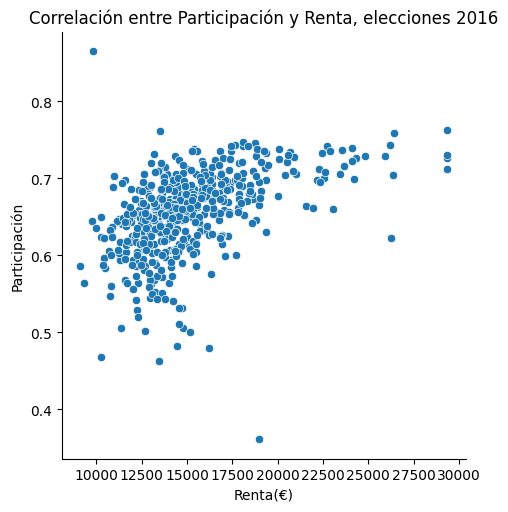

In [16]:
sns.relplot(data=df_16, y="Participación", x="Total").set(title='Correlación entre Participación y Renta, elecciones 2016')
plt.xlabel('Renta(€)');

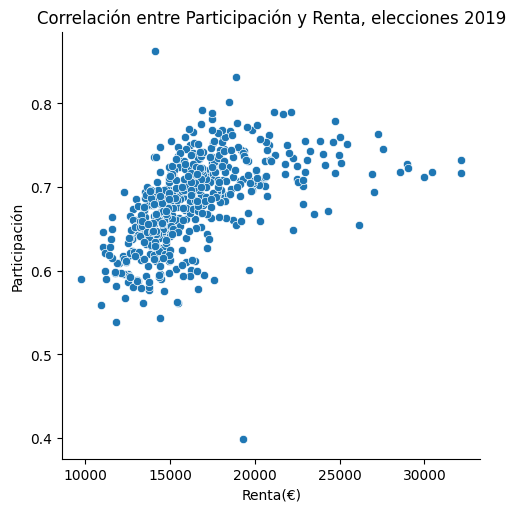

In [18]:
sns.relplot(data=df_19, y="Participación", x="Total").set(title='Correlación entre Participación y Renta, elecciones 2019')
plt.xlabel('Renta(€)');

Ya se ve claramente una tendencia a la correlación entre mayor Renta y mayor Participación. Lo chequeamos con su debida función.

In [19]:
df_16_corr = pd.read_csv('..\\..\\raw data\\df_16_corr.csv')

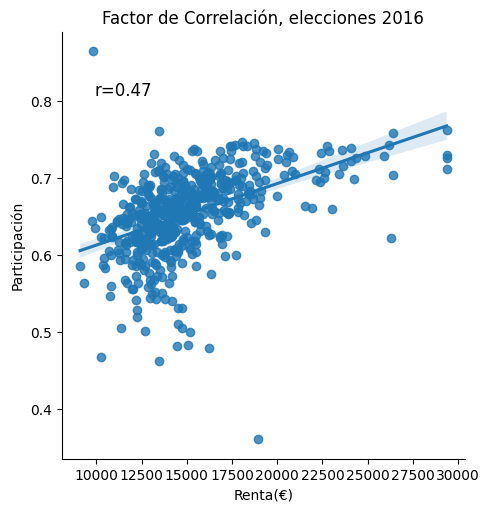

In [22]:
sns.lmplot(data=df_16_corr, y="Participación", x="Total").set(title='Factor de Correlación, elecciones 2016')
r, p = sp.stats.pearsonr(x=df_16_corr["Total"], y=df_16_corr['Participación'])
ax = plt.gca()
plt.text(.08, .85, 'r={:.2f}'.format(r),fontsize='large',transform=ax.transAxes)
plt.xlabel('Renta(€)');

El caso de 2019 es parecido.

![correlacion2019](../../resources/correlacion2019.png)

![correlacion22019](../../resources/factorcorrelacion2019.png)

Podríamos dar por verificada la hipótesis primaria, pero se observa cómo las gráficas, al subir la renta tienden a valores parecidos.
¿Podríamos estar ante una paradoja de Simpson? Lo chequearemos sacando la correlación por Cuartiles.

![simpson16](../../resources/simpson2016.png)

![simpson19](../../resources/simpson2019.png)

<a id="6"></a> <br>
## 6.Correlación Variación de Renta-Variación de Participación

Añadiremos a los dataframes originales dos columnas, con la variación tanto de Renta como de Participación, ponderada con la media propia del año en ambos casos.

In [23]:
df_16_sort_v = pd.read_csv('..\\..\\raw data\\df_16_sort_v.csv')

In [24]:
df_16_sort_v

,Nombre Sección,Sección,Total,censo,votos_total,Participación,desviación renta 16,cambio renta 16-19,desviación participación 16,cambio voto 16-19
0,Donostia/San Sebastián sección 03032,6903032,17414.0,1379.0,1024.0,0.742567,2350.26789,2060.343119,348.514706,-520.103697
1,Donostia/San Sebastián sección 03031,6903031,18005.0,1805.0,1265.0,0.700831,2941.26789,1488.343119,589.514706,-292.103697
2,Errenteria sección 01029,6701029,11674.0,1393.0,911.0,0.653984,-3389.73211,41.343119,235.514706,-129.103697
3,Errenteria sección 01027,6701027,11498.0,1361.0,908.0,0.667157,-3565.73211,-204.656881,232.514706,-101.103697
4,Donostia/San Sebastián sección 07002,6907002,12908.0,1358.0,920.0,0.677467,-2155.73211,25.343119,244.514706,-99.103697
...,...,...,...,...,...,...,...,...,...,...
541,NaN,999090000,NaN,5723.0,2768.0,0.483662,NaN,NaN,2092.514706,284.896303
542,Azpeitia sección 01005,1801005,17246.0,1794.0,1121.0,0.624861,2182.26789,-524.656881,445.514706,319.896303
543,Astigarraga sección 01002,90301002,14353.0,1195.0,724.0,0.605858,-710.73211,1688.343119,48.514706,375.896303
544,Donostia/San Sebastián sección 03033,6903033,15063.0,NaN,NaN,NaN,-0.73211,1477.343119,NaN,NaN


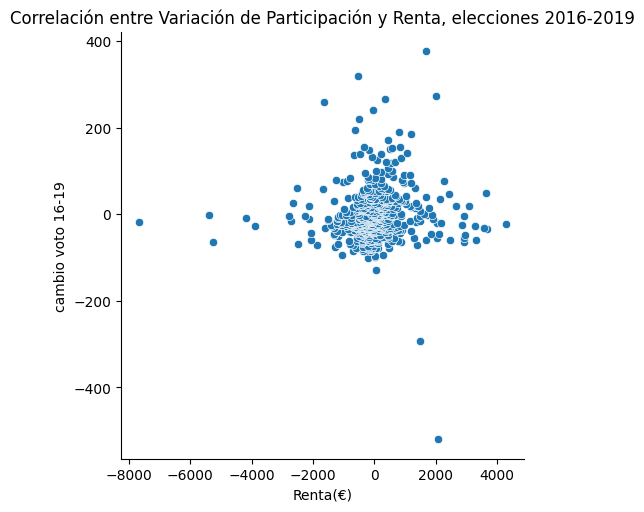

In [25]:
sns.relplot(data=df_16_sort_v, y="cambio voto 16-19", x="cambio renta 16-19").set(title='Correlación entre Variación de Participación y Renta, elecciones 2016-2019')
plt.xlabel('Renta(€)');

Parece obvio que esta segunda hipótesis no va a verse verificada. Una subida en la renta media de una unidad censal no conlleva un aumento de la participación.

Veamoslo analizado.

![secundarias2016](../../resources/secundaria2016-2019.png)


<a id="7"></a> <br>
## 7.Conclusiones finales

+ Se ha verificado la hipótesis principal del EDA, incluyendo un análisis secundario de la posibilidad de estar ante una falacia de Simpson. Parece una respuesta satisfactoria y robusta.
+ Se ha analizado la relevancia del cambio socioeconómico entre dos procesos electorales, sin encontrar relación alguna entre estos y el cambio en la participación electoral.